In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import inspect
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('Station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

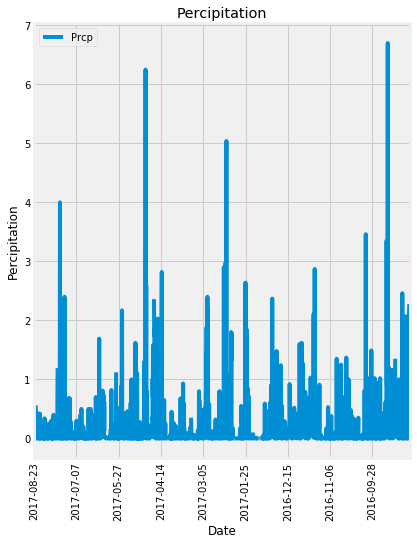

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
#session.query(Measurement.date).order_by(Measurement.date).first()
#earliest-2010-01-01'
#session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#latest-2017-08-23'



# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date > '2016-08-23').order_by(Measurement.date.desc()).all()
results
stati = [result[0] for result in results]
datei = [result[1] for result in results]
prcpi = [result[2] for result in results]
tobsi = [result[3] for result in results]
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
dateprcp_df=pd.DataFrame(list(zip(stati,datei,prcpi)),columns=['Station','Date','Prcp'])
dateprcp_df=dateprcp_df.set_index('Date')
dateprcp_df
# Use Pandas Plotting with Matplotlib to plot the data


dateprcp_df.plot(rot=90, figsize=(6,8))
plt.title("Percipitation")
plt.xlabel("Date")
plt.ylabel("Percipitation")
plt.savefig("percipitation.png")

In [14]:
dateprcp_df

,Station,Prcp
Date,,
2017-08-23,USC00519397,0.00
2017-08-23,USC00514830,0.00
2017-08-23,USC00519523,0.08
2017-08-23,USC00516128,0.45
2017-08-22,USC00519397,0.00
...,...,...
2016-08-24,USC00514830,2.28
2016-08-24,USC00517948,NaN
2016-08-24,USC00519523,1.22


In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
dateprcp_df.describe()

,Prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# Design a query to show how many stations are available in this dataset?
results = session.query(Measurement.station).distinct().count()
print(f"{results} Stations")

9 Stations


In [17]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
prcp_count=session.query(Measurement.station, func.count(Measurement.prcp)).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).all()
temp_count=session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.prcp).desc()).first()


In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
temps = session.query(func.max(Measurement.tobs),func.min(Measurement.tobs),func.avg(Measurement.tobs)).filter_by(station='USC00519281').all()

print(temps)


[(85.0, 54.0, 71.66378066378067)]


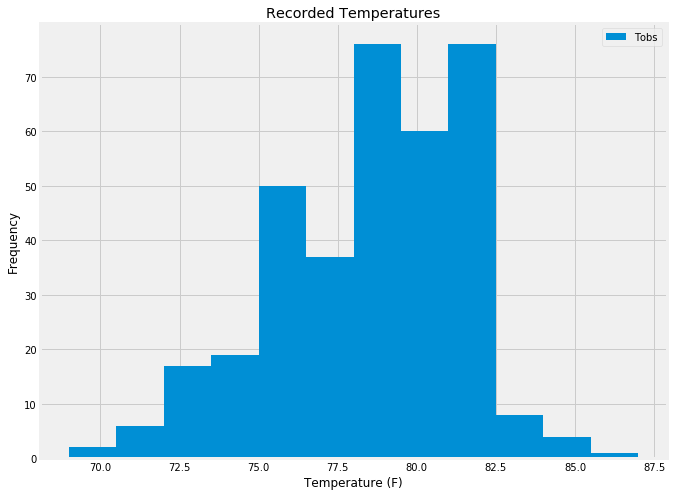

In [19]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results2 = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date > '2016-08-18').filter_by(station='USC00519281').order_by(Measurement.date.desc()).all()
results2
stati2 = [result[0] for result in results2]
datei2 = [result[1] for result in results2]
prcpi2 = [result[2] for result in results2]
tobsi2 = [result[3] for result in results2]
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
dateprcp_df2=pd.DataFrame(list(zip(stati2,datei2,tobsi)),columns=['Station','Date','Tobs'])
dateprcp_df2=dateprcp_df2.set_index('Date')
dateprcp_df2

dateprcp_df2.plot(kind="hist", bins=12,figsize=(10,8))
plt.title('Recorded Temperatures')

plt.ylabel('Frequency')
plt.xlabel(s='Temperature (F)')
plt.savefig("temps.png")

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
temps=[]
tempies=calc_temps('2017-02-28', '2017-03-05')

for temp in tempies:
    temps.append(temp)
    
print(temps)

print((temps[0][2])-(temps[0][0]))

[(64.0, 72.02777777777777, 78.0)]
14.0


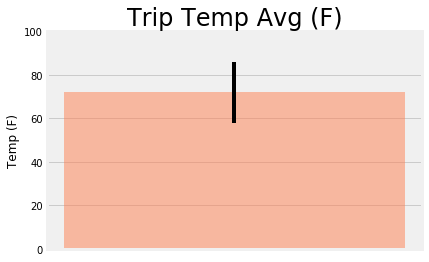

In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

yval = 1
xvalue = temps[0][1]
plt.bar(yval,xvalue,yerr=(temps[0][2])-(temps[0][0]), color="coral", width=0.2 ,alpha=0.5)
plt.title('Trip Temp Avg (F)',fontsize=24)
plt.yticks([0,20,40,60,80,100])
plt.xticks([])

plt.ylabel('Temp (F)')
plt.savefig("tempavg.png")

In [23]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Measurement.station, Measurement.date, func.sum(Measurement.prcp), Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
seljoin = session.query(*sel).filter(Measurement.station == Station.station).filter(Measurement.date > '2016-08-23').all()


rainfall_count=session.query(*sel).filter(Measurement.station == Station.station).group_by(Station.station).order_by(func.sum(Measurement.prcp).desc()).all()
rainfall_count



[('USC00516128',
  '2010-01-01',
  1068.0899999999956,
  'USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00519281',
  '2010-01-01',
  588.6399999999976,
  'USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00513117',
  '2010-01-01',
  382.61999999999847,
  'USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6),
 ('USC00519523',
  '2010-01-01',
  295.67999999999944,
  'USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  '2010-03-01',
  234.49000000000026,
  'USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00519397',
  '2010-01-01',
  131.62000000000063,
  'USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00511918',
  '2010-01-01',
  92.68000000000006,
  'USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9),
 ('USC00518838',
  '20

## Optional Challenge Assignment

In [145]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [Measurement.date, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).filter(Measurement.date > '2016-08-23').all()
    
daily_normals("01-01")

[('2017-01-01', 62.0, 69.33333333333333, 74.0)]

In [147]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
d1=daily_normals("02-01")
d2=daily_normals("02-02")
d3=daily_normals("02-03")
d4=daily_normals("02-04")
d5=daily_normals("02-05")
d6=daily_normals("02-06")
d7=daily_normals("02-07")

normals=[d1,d2,d3,d4,d5,d6,d7]
normals
# Set the start and end date of the trip

date = [normal[0][0] for normal in normals]
tmin = [normal[0][1] for normal in normals]
tmax = [normal[0][2] for normal in normals]
tavg = [normal[0][3] for normal in normals]

# # Stip off the year and save a list of %m-%d strings
normals_df=pd.DataFrame(list(zip(date,tmin,tmax,tavg)),columns=['date','tmin','tmax','tavg'])
normals_df=normals_df.set_index('date')
normals_df
# # Loop through the list of %m-%d strings and calculate the normals for each date


,tmin,tmax,tavg
date,,,
2017-02-01,62.0,68.000000,72.0
2017-02-02,59.0,64.142857,72.0
2017-02-03,60.0,66.000000,73.0
2017-02-04,66.0,70.200000,76.0
2017-02-05,69.0,74.500000,80.0
2017-02-06,73.0,75.285714,77.0
2017-02-07,64.0,68.285714,76.0


In [149]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [150]:
# Plot the daily normals as an area plot with `stacked=False`
normals_df

,tmin,tmax,tavg
date,,,
2017-02-01,62.0,68.000000,72.0
2017-02-02,59.0,64.142857,72.0
2017-02-03,60.0,66.000000,73.0
2017-02-04,66.0,70.200000,76.0
2017-02-05,69.0,74.500000,80.0
2017-02-06,73.0,75.285714,77.0
2017-02-07,64.0,68.285714,76.0


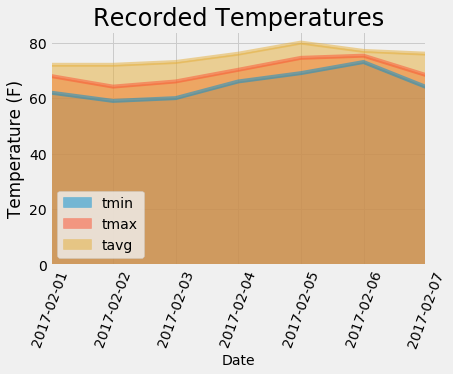

In [151]:
normals_df.plot.area(stacked=False)
plt.title('Recorded Temperatures',fontsize=24, alpha=1)

plt.ylabel('Temperature (F)')
plt.xlabel(s='Date',fontsize=14)
plt.xticks(rotation=70)
plt.savefig("recorded_temps.png")